In [3]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("./data/adult.data",header=None,index_col=False,
                names=['age','workclass','fnlwgt','education','education-num',
                      'marital-status','occupation','relationship','race','gender',
                      'capital-gain','capital-loss','hours-per-week','native-country',
                      'income'])
data=data[['age','workclass','education','gender','hours-per-week','occupation','income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
for key in data.keys():
    print((key+" - ")*10)
    print(data[key].value_counts())

age - age - age - age - age - age - age - age - age - age - 
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
workclass - workclass - workclass - workclass - workclass - workclass - workclass - workclass - workclass - workclass - 
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
education - education - education - education - education - education - education - education - education - education - 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 D

In [6]:
print("Original features:\n",list(data.columns),"\n")
data_dummies=pd.get_dummies(data)
print("Features after get_dummies:\n",list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [7]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [8]:
features=data_dummies.loc[:,'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape,y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [9]:
features.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
logreg=LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)
print("Test score: {:.2f}".format(logreg.score(X_test,y_test)))

Test score: 0.81


In [11]:
demo_df=pd.DataFrame({"Integer Feature":[0,1,2,1],
                     "Categorical Feature":["socks","fox",'socks','box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [12]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [13]:
demo_df['Integer Feature']=demo_df['Integer Feature'].astype(int)
print(pd.get_dummies(demo_df,columns=['Integer Feature',"Categorical Feature"]))
demo_df['Integer Feature']=demo_df['Integer Feature'].astype(str)
print(pd.get_dummies(demo_df,columns=['Integer Feature',"Categorical Feature"]))

   Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0  
   Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                  1                  0                  0   
1                  0                  1                  0   
2                  0                  0                  1   
3                  0                

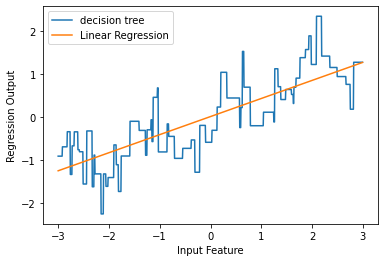

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X,y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line),label="decision tree")

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="Linear Regression")
plt.xlabel("Input Feature")
plt.ylabel("Regression Output")
plt.legend(loc="best")

In [15]:
X.shape
y.shape

(100,)

In [16]:
bins=np.linspace(-3,3,11)
print(f"bins: {bins}")

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [17]:
which_bin=np.digitize(X,bins=bins)
print(f"\nData points:\n {X[:5]}")
print(f"\nBin membership for data points:\n {which_bin[:5]}")


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned=encoder.transform(which_bin)
print(X_binned[:5])
print(X_binned.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
(100, 10)


Text(0.5, 0, 'Input feature')

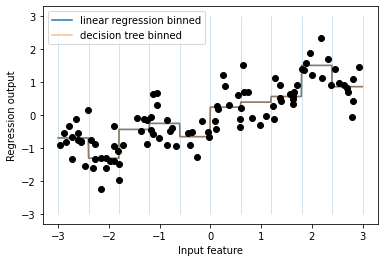

In [19]:
line_binned=encoder.transform(np.digitize(line,bins=bins))
reg=LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label="linear regression binned")
reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label="decision tree binned",alpha=0.5)
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(bins,-3,3,linewidth=1,alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [20]:
X_combined=np.hstack([X,X_binned])
print(X_combined.shape)

(100, 11)


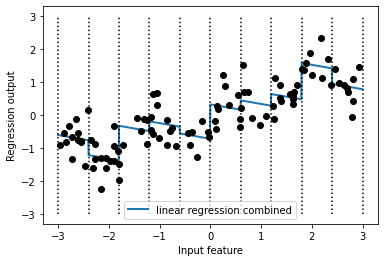

In [21]:
reg=LinearRegression().fit(X_combined,y)
line_combined=np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined),label="linear regression combined",linewidth=2)
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o',c='k')

In [22]:
X_product=np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(100, 20)


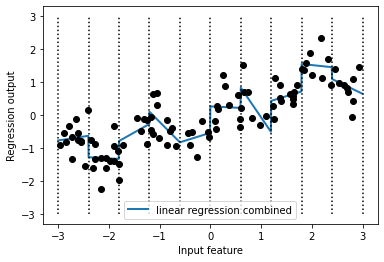

In [23]:
reg=LinearRegression().fit(X_product,y)
line_product=np.hstack([line_binned,line*line_binned])
plt.plot(line,reg.predict(line_product),label="linear regression combined",linewidth=2)
for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0],y,'o',c='k')

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=10,include_bias=False)
poly.fit(X)
X_poly=poly.transform(X)
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [25]:
np.set_printoptions(precision=3,suppress=True)
print("Entries fo X:\n {}".format(X[:5]))
print("Entries fo X_poly:\n {}".format(X_poly[:5]))

Entries fo X:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Entries fo X_poly:
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [26]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

Text(0.5, 0, 'Input feature')

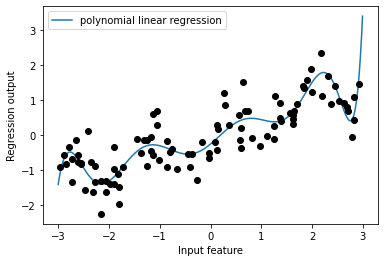

In [27]:
reg=LinearRegression().fit(X_poly,y)
line_poly=poly.transform(line)
plt.plot(line,reg.predict(line_poly),label="polynomial linear regression")
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

Text(0.5, 0, 'Input feature')

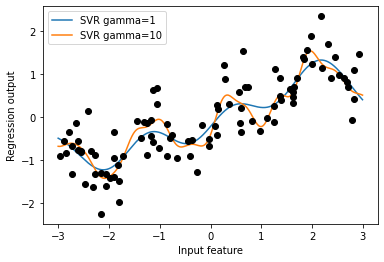

In [28]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label="SVR gamma={}".format(gamma))
    
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [29]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston=load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [30]:
poly=PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly=poly.transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [31]:
print(boston.feature_names)
print(boston['data'][:5])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[  0.006  18.      2.31    0.      0.538   6.575  65.2     4.09    1.
  296.     15.3   396.9     4.98 ]
 [  0.027   0.      7.07    0.      0.469   6.421  78.9     4.967   2.
  242.     17.8   396.9     9.14 ]
 [  0.027   0.      7.07    0.      0.469   7.185  61.1     4.967   2.
  242.     17.8   392.83    4.03 ]
 [  0.032   0.      2.18    0.      0.458   6.998  45.8     6.062   3.
  222.     18.7   394.63    2.94 ]
 [  0.069   0.      2.18    0.      0.458   7.147  54.2     6.062   3.
  222.     18.7   396.9     5.33 ]]


In [32]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [33]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge=Ridge().fit(X_train_poly,y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly,y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled,y_test)))
rf=RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly,y_test)))

Score without interactions: 0.790
Score with interactions: 0.768


In [35]:
rnd=np.random.RandomState(0)
X_org=rnd.normal(size=(1000,3))
w=rnd.normal(size=3)

X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)

In [36]:
print(X_org[0:5])
print("Number of first feature appearances:\n{}".format(np.bincount(X[:,0])))
print(X[0:5])
print(10*np.exp(X_org)[:5])

[[ 1.764  0.4    0.979]
 [ 2.241  1.868 -0.977]
 [ 0.95  -0.151 -0.103]
 [ 0.411  0.144  1.454]
 [ 0.761  0.122  0.444]]
Number of first feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
[[56 18 27]
 [81 57  3]
 [25  9 11]
 [20 13 30]
 [27 13 13]]
[[58.36  14.921 26.611]
 [94.017 64.725  3.763]
 [25.859  8.595  9.019]
 [15.077 11.549 42.814]
 [21.405 11.294 15.587]]


Text(0.5, 0, 'Value')

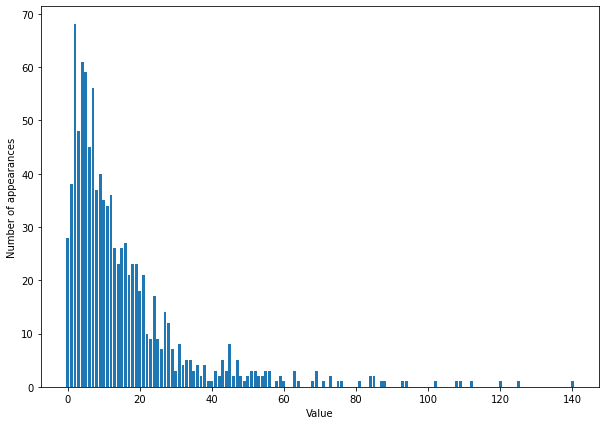

In [37]:
bins=np.bincount(X[:,0])
plt.figure(figsize=(10,7))
plt.bar(range(len(bins)),bins)
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [38]:
from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
score=Ridge().fit(X_train,y_train).score(X_test,y_test)
print("Test SCore: {:.3f}".format(score))

Test SCore: 0.622


In [39]:
X_train_log=np.log(X_train+1)
X_test_log=np.log(X_test+1)

Text(0.5, 0, 'Value')

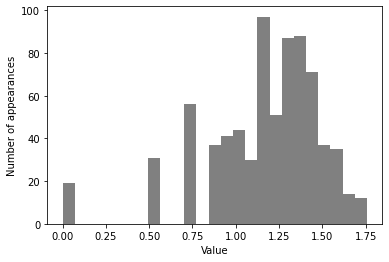

In [40]:
plt.hist(np.log(X_train_log[:,0]+1),bins=25,color="gray")
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [41]:
score=Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("Test SCore: {:.3f}".format(score))

Test SCore: 0.875


In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))
X_w_noise=np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,random_state=0,test_size=.5)
select=SelectPercentile(percentile=50)
select.fit(X_train,y_train)
X_train_selected=select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

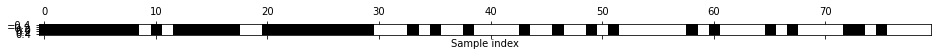

In [43]:
mask=select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("Sample index")

In [44]:
from sklearn.linear_model import LogisticRegression
X_test_selected=select.transform(X_test)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected,y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42),threshold="median")
select.fit(X_train,y_train)
X_train_l1=select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'sample index')

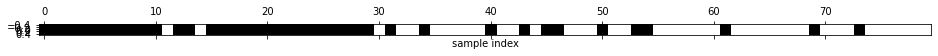

In [46]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("sample index")

In [47]:
X_test_l1=select.transform(X_test)
score=LogisticRegression(max_iter=10000).fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("Test score: {}".format(score))

Test score: 0.9473684210526315


Text(0.5, 0, 'Sample index')

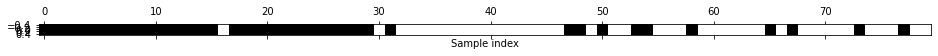

In [48]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=40)
select.fit(X_train,y_train)
mask=select.get_support()
plt.matshow(mask.reshape(1,-1),cmap="gray_r")
plt.xlabel("Sample index")

In [50]:
X_train_rfe=select.transform(X_train)
X_test_rfe=select.transform(X_test)
score=LogisticRegression(max_iter=10000).fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.940


In [51]:
citibike=mglearn.datasets.load_citibike()
print("Citi bike data:\n{}".format(citibike.head()))

Citi bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

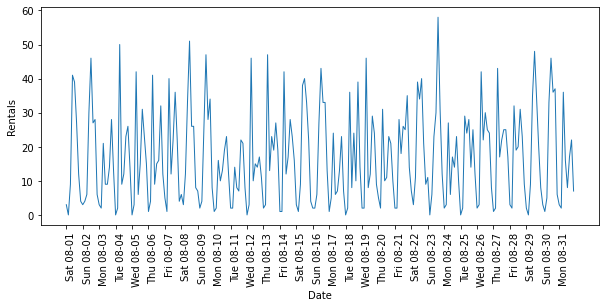

In [52]:
plt.figure(figsize=(10,4))
xticks=pd.date_range(start=citibike.index.min(),end=citibike.index.max())
plt.xticks(xticks,xticks.strftime("%a %m-%d"),rotation=90,ha="left")
plt.plot(citibike,linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [75]:
y=citibike.values
X=np.array(citibike.index.astype(int)).reshape(-1,1)

In [76]:
n_train=184

def eval_on_features(features,target,regressor):
    X_train,X_test=features[:n_train],features[n_train:]
    y_train,y_test=target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test,y_test)))
    y_pred=regressor.predict(X_test)
    y_pred_train=regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    plt.xticks(range(0,len(X),8),xticks.strftime("%a %m-%d"),rotation=90,ha="left")
    plt.plot(range(n_train),y_train,label="train")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label="test")
    plt.plot(range(n_train),y_pred_train,'--',label="prediction train")
    plt.plot(range(n_train,len(y_pred)+n_train),y_pred,'--',label="prediction test")
    plt.legend(loc=(1.01,0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

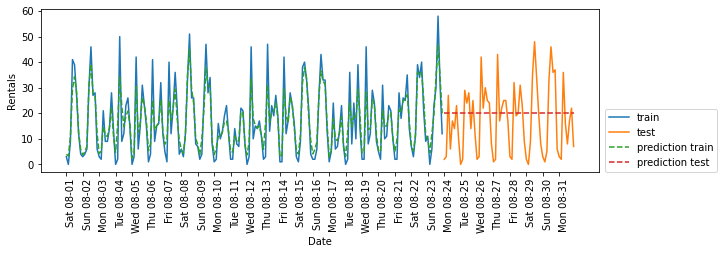

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval_on_features(X,y,regressor)

Test-set R^2: 0.60


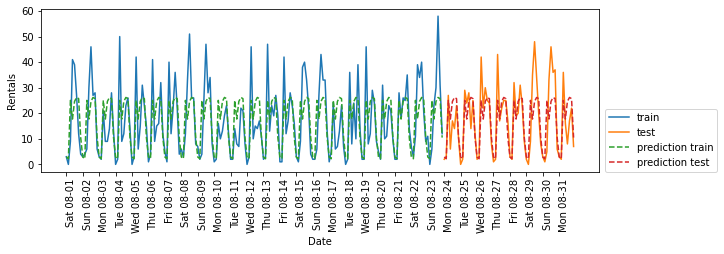

In [79]:
X_hour=np.array(citibike.index.hour).reshape(-1,1)
eval_on_features(X_hour,y,regressor)

Test-set R^2: 0.84


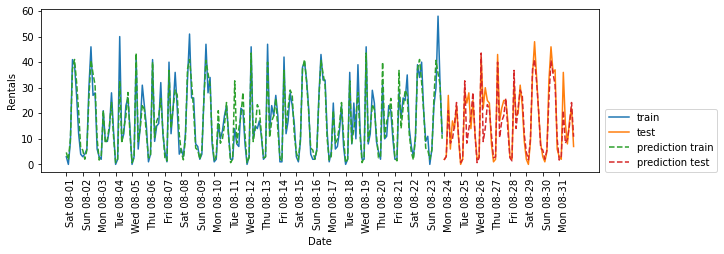

In [80]:
X_hour_week=np.hstack([np.array(citibike.index.dayofweek).reshape(-1,1),
                      np.array(citibike.index.hour).reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

Test-set R^2: 0.13


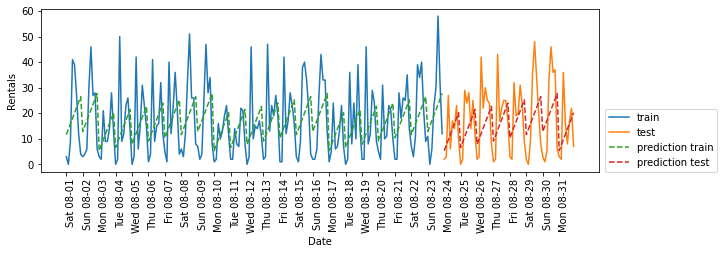

In [81]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())

In [84]:
enc=OneHotEncoder()
X_hour_week_onehot=enc.fit_transform(X_hour_week).toarray()
X_hour_week_onehot[:10]

array([[0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.]])

Test-set R^2: 0.62


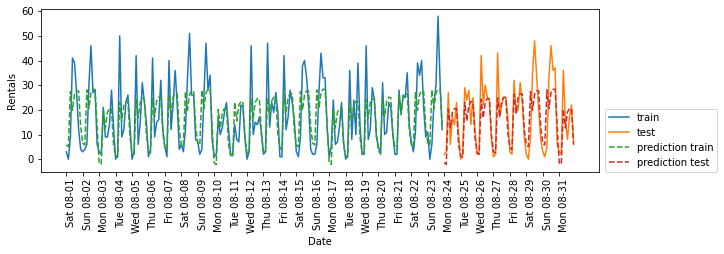

In [86]:
eval_on_features(X_hour_week_onehot,y,Ridge())

Test-set R^2: 0.85


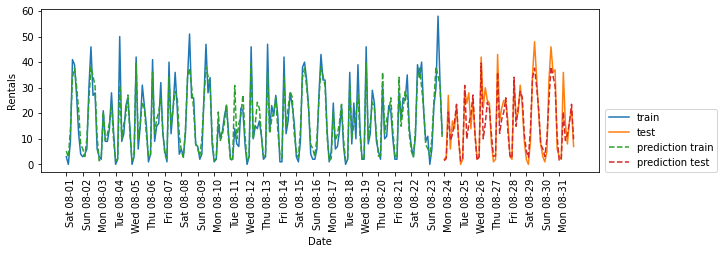

In [88]:
poly_transformer=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_hour_week_onehot_poly=poly_transformer.fit_transform(X_hour_week_onehot)
lr=Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)

In [90]:
hour=["%02d:00" % i for i in range(0,24,3)]
day=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features=day+hour
print(features)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']


In [91]:
features_poly=poly_transformer.get_feature_names(features)
features_nonzero=np.array(features_poly)[lr.coef_!=0]
coef_nonzero=lr.coef_[lr.coef_!=0]

Text(0.5, 0, 'Feature')

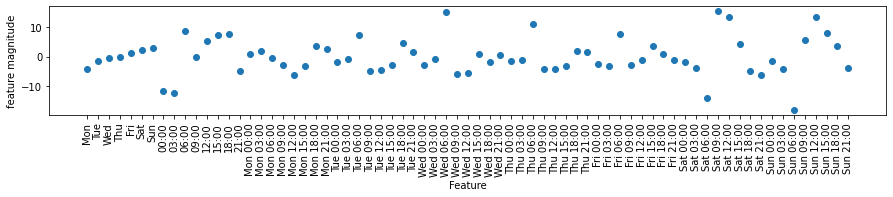

In [93]:
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero,rotation=90)
plt.ylabel("feature magnitude")
plt.xlabel("Feature")